Importing packages to be used:

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from openpyxl import load_workbook
from datetime import date
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import os # to work with local directory
import re
import plotly.express as px
import scipy.stats
from scipy.interpolate import interp1d
from itertools import islice
import seaborn as sb


<H1> Collection Of data </H1>

<h3> Importing Data </h3>

<h5> Deriving data from local files </h5>


In [2]:
# To convert openpyxl files to data frames
def toDataFrame(ws):
    data = ws.values
    cols = next(data)[1:]
    data = list(data)
    idx = [r[0] for r in data]
    data = (islice(r, 1, None) for r in data)
    return pd.DataFrame(data, index=idx, columns=cols)

In [3]:
wb_JHU_confirmed = load_workbook(r"OrigData\\time-series-covid19-confirmed-global.xlsx")  
ws_JHU_confirmed = wb_JHU_confirmed[wb_JHU_confirmed.sheetnames[0]]
df_JHU_confirmed = toDataFrame(ws_JHU_confirmed)

wb_JHU_fatality = load_workbook(r"OrigData\\time_series_covid19_deaths_global.xlsx")  
ws_JHU_fatality = wb_JHU_fatality[wb_JHU_fatality.sheetnames[0]]
df_JHU_fatality = toDataFrame(ws_JHU_fatality)

wb_covid_data = load_workbook(r"OrigData\\owid-covid-data.xlsx")
ws_covid_data = wb_covid_data[wb_covid_data.sheetnames[0]]
df_covid_data = toDataFrame(ws_covid_data)

wb_age_data = load_workbook(r"OrigData\\statistic_id1110522_number-of-covid-19-cases-india-2020-by-age-group.xlsx")  # Work Book
ws_age_data = wb_age_data[wb_age_data.sheetnames[1]]
df_age_data = pd.DataFrame(ws_age_data.values)

wb_altitude = load_workbook(r"OrigData\\DA data altitude.xlsx")
ws_altitude = wb_altitude[wb_altitude.sheetnames[0]]
df_altitude = toDataFrame(ws_altitude)

wb_economy = load_workbook(r"OrigData\\GDP20192020.xlsx")  # Work Book
ws_economy = wb_economy[wb_economy.sheetnames[0]]
df_economy = toDataFrame(ws_economy)

wb_economy_IND = load_workbook(r"OrigData\\IND_eco.xlsx")
ws_economy_IND = wb_economy_IND[wb_economy_IND.sheetnames[0]]
df_economy_IND = toDataFrame(ws_economy_IND)

<h3> Assessing the Imported Data Visually</h3>

In [4]:
df_JHU_fatality.sample(n=5)

Country/Region        Lat        Long  1/22/20  1/23/20  \
Inner Mongolia           China  44.093500  113.944800        0        0   
NaN                New Zealand -40.900600  174.886000        0        0   
Cayman Islands  United Kingdom  19.313300  -81.254600        0        0   
NaN                Timor-Leste  -8.874217  125.727539        0        0   
NaN                       Cuba  21.521757  -77.781167        0        0   

                1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  ...  11/21/20  \
Inner Mongolia        0        0        0        0        0  ...         1   
NaN                   0        0        0        0        0  ...        25   
Cayman Islands        0        0        0        0        0  ...         2   
NaN                   0        0        0        0        0  ...         0   
NaN                   0        0        0        0        0  ...       132   

                11/22/20  11/23/20  11/24/20  11/25/20  11/26/20  11/27/20  \
Inner Mongolia         1         1         1         1         1         1   
NaN                   25        25        25        25        25        25   
Cayman Islands         2         2         2         2         2         2   
NaN                    0         0         0         0         0         0   
NaN                  132       132       133       133       133       133   

                11/28/20  11/29/20  11/30/20  
Inner Mongolia         1         1         1  
NaN                   25        25        25  
Cayman Islands         2         2         2  
NaN                    0         0         0  
NaN                  133       134       135  

[5 rows x 317 columns]

In [5]:
df_JHU_confirmed.head(n=5)

Country/Region       Lat       Long  1/22/20  1/23/20  1/24/20  1/25/20  \
NaN    Afghanistan  33.93911  67.709953        0        0        0        0   
NaN        Albania  41.15330  20.168300        0        0        0        0   
NaN        Algeria  28.03390   1.659600        0        0        0        0   
NaN        Andorra  42.50630   1.521800        0        0        0        0   
NaN         Angola -11.20270  17.873900        0        0        0        0   

     1/26/20  1/27/20  1/28/20  ...  11/21/20  11/22/20  11/23/20  11/24/20  \
NaN        0        0        0  ...     44503     44706     44988     45280   
NaN        0        0        0  ...     32196     32761     33556     34300   
NaN        0        0        0  ...     73774     74862     75867     77000   
NaN        0        0        0  ...      6207      6256      6304      6351   
NaN        0        0        0  ...     14413     14493     14634     14742   

     11/25/20  11/26/20  11/27/20  11/28/20  11/29/20  11/30/20  
NaN     45490     45716     45839     45966     46215     46498  
NaN     34944     35600     36245     36790     37625     38182  
NaN     78025     79110     80168     81212     82221     83199  
NaN      6428      6534      6610      6610      6712      6745  
NaN     14821     14920     15008     15087     15103     15139  

[5 rows x 317 columns]

In [6]:
df_country_cases = df_JHU_confirmed[['Country/Region','Lat','Long','11/30/20']]
df_country_cases.sample(5)

Country/Region        Lat      Long  11/30/20
NaN                Spain  40.463667  -3.74922   1648187
NaN  Congo (Brazzaville)  -0.228000  15.82770      5774
NaN            Argentina -38.416100 -63.61670   1424533
NaN             Honduras  15.200000 -86.24190    108253
NaN             Ethiopia   9.145000  40.48970    110074

In [72]:
df_selectedCountries = df_country_cases.loc[df_country_cases["Country/Region"].isin(["India", "US", "Japan","Sweden","France"])]
df_selectedCountries

Country/Region        Lat        Long  11/30/20
French Guiana                     France   3.933900  -53.125800     11204
French Polynesia                  France -17.679700  149.406800     14372
Guadeloupe                        France  16.265000  -61.551000      8344
Martinique                        France  14.641500  -61.024200      5413
Mayotte                           France -12.827500   45.166244      5181
New Caledonia                     France -20.904305  165.618042        33
Reunion                           France -21.115100   55.536400      8054
Saint Barthelemy                  France  17.900000  -62.833300       147
Saint Pierre and Miquelon         France  46.885200  -56.315900        16
St Martin                         France  18.070800  -63.050100       717
NaN                               France  46.227600    2.213700   2221535
NaN                                India  20.593684   78.962880   9462809
NaN                                Japan  36.204824  138.252924    148962
NaN                               Sweden  60.128161   18.643501    243129
NaN                                   US  40.000000 -100.000000  13541221

In [7]:
df_covid_data.head(n=5)

continent     location        date  total_cases  new_cases  \
AFG      Asia  Afghanistan  2020-01-23          NaN        0.0   
AFG      Asia  Afghanistan  2020-01-24          NaN        0.0   
AFG      Asia  Afghanistan  2020-01-25          NaN        0.0   
AFG      Asia  Afghanistan  2020-01-26          NaN        0.0   
AFG      Asia  Afghanistan  2020-01-27          NaN        0.0   

     new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
AFG                 NaN           NaN         0.0                  NaN   
AFG                 NaN           NaN         0.0                  NaN   
AFG                 NaN           NaN         0.0                  NaN   
AFG                 NaN           NaN         0.0                  NaN   
AFG                 NaN           NaN         0.0                  NaN   

     total_cases_per_million  ...  gdp_per_capita  extreme_poverty  \
AFG                      NaN  ...        1803.987              NaN   
AFG                      NaN  ...        1803.987              NaN   
AFG                      NaN  ...        1803.987              NaN   
AFG                      NaN  ...        1803.987              NaN   
AFG                      NaN  ...        1803.987              NaN   

     cardiovasc_death_rate  diabetes_prevalence  female_smokers  male_smokers  \
AFG                597.029                 9.59             NaN           NaN   
AFG                597.029                 9.59             NaN           NaN   
AFG                597.029                 9.59             NaN           NaN   
AFG                597.029                 9.59             NaN           NaN   
AFG                597.029                 9.59             NaN           NaN   

     handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
AFG                  37.746                         0.5            64.83   
AFG                  37.746                         0.5            64.83   
AFG                  37.746                         0.5            64.83   
AFG                  37.746                         0.5            64.83   
AFG                  37.746                         0.5            64.83   

     human_development_index  
AFG                    0.498  
AFG                    0.498  
AFG                    0.498  
AFG                    0.498  
AFG                    0.498  

[5 rows x 49 columns]

In [8]:
df_age_data.iloc[[5,6, 7, 8,9,10], [1, 2]]

1     2
5   Less than 14 years   0.5
6          15-29 years   2.5
7          30-44 years  11.4
8          45-59 years  35.1
9          60-74 years  40.2
10  More than 75 years  10.3

In [9]:
df_altitude.head(5)

Fatality ratio  No of cases            Altitude          NaN  \
Afghanistan          0.0383       1737.0  1,885 m (6,184 ft)  Afghanistan   
Algeria              0.0297       2352.0    800 m (2,625 ft)      Algeria   
Angola               0.0229        340.0  1,112 m (3,648 ft)       Angola   
Argentina            0.0271      37941.0    595 m (1,952 ft)    Argentina   
Australia            0.0325        907.0    330 m (1,083 ft)    Australia   

             population density   NaN  
Afghanistan                49.0  None  
Algeria                    18.0  None  
Angola                     23.0  None  
Argentina                  16.0  None  
Australia                   3.0  None

In [10]:
df_economy_IND.head(5)

INFLATION RATE INDIA INFRASTRUCTURE OUTPUT LENDING RATES  \
2019-11-01           5.54                         0.7           9.4   
2019-12-01           7.35                         3.1           9.4   
2020-01-01           7.59                         2.2           9.4   
2020-02-01           6.58                         6.4           9.4   
2020-03-01           5.84                        -8.6           9.4   

           REPO RATES GOVERNMENT REVENUES  CONSUMER SPENDING   NaN  QUARTER  \
2019-11-01        4.9              10122.2             19119  None  2018 Q1   
2019-12-01        4.9              11779.2           19841.8  None   2018Q2   
2020-01-01        4.9              12828.6           18890.1  None  2018 Q3   
2020-02-01        4.9              14288.7           19038.5  None  2018 Q4   
2020-03-01          4              17507.3           20464.2  None  2019 Q1   

           Business Expectations Index (BEI)  
2019-11-01                               115  
2019-12-01                             115.8  
2020-01-01                             114.6  
2020-02-01                             114.1  
2020-03-01                               115

<h3> Organising the Imported Data via Program </h3>

In [11]:
# List of countries available in JHU and OWID data sets
print("countries available in John Hopkins Dataset :")
df_JHU_confirmed['Country/Region'].unique()


countries available in John Hopkins Dataset :


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [10]:
print("countries available in OWID :")
df_covid_data[2].unique()


countries available in OWID :


array(['location', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Democratic Republic of Congo', 'Congo', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Western Sahara',
       'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France',
       'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial Guinea'

In [12]:
letters = "a b c d e f g h i j k l m n o p q r s t u v w x y z".upper().split()
alphas = []
for i in letters:
    alphas.append(i)
for i in letters:
    for j in letters:
        k = (i+j)
        alphas.append(k)
        if k == 'LF':
            break
    if i == 'L':
        break
alphas = alphas[4:]        


Collecting total cases in world using JHU data:

In [13]:
totalCasesInWorldJHU = []
dateTotalCasesInWorldJHU = []
for X in alphas:
    column = ws_JHU_confirmed[X]
    Sum = 0
    for i in range(1,272):
        Sum+=column[i].value
    if isinstance(column[0].value, str): 
        dateTotalCasesInWorldJHU.append(column[0].value)
    else: 
        dateTotalCasesInWorldJHU.append(column[0].value.strftime('%d/%m/%Y'))
    totalCasesInWorldJHU.append(Sum)

Collecting total deaths in world using JHU data:

In [14]:
totalDeathsInWorldJHU = []
dateTotalDeathsInWorldJHU = []
for X in alphas:
    column = ws_JHU_fatality[X]
    Sum = 0
    for i in range(1,272):
        Sum+=column[i].value
    if isinstance(column[0].value, str): 
        dateTotalDeathsInWorldJHU.append(column[0].value)
    else: 
        dateTotalDeathsInWorldJHU.append(column[0].value.strftime('%d/%m/%Y'))
    totalDeathsInWorldJHU.append(Sum)


Storing all data from OWID into a dictionary

In [15]:
dataCol = "a b c d e f g h i j k l m n o p q r s t u v w x y z aa ab ac ad ae af ag ah ai aj ak al am an ao ap aq ar as at au av aw ax".upper().split(" ")
dataOWID = {}
for X in dataCol:
    column = ws_covid_data[X]
    sample = []
    for x in range(1,len(column)):
          sample.append(column[x].value)
    dataOWID[column[0].value] = sample  
def dailyKeyReturnerUsingLoc(code,key):
    loc = dataOWID['location']
    date = dataOWID['date']
    total_cases = dataOWID[key]
    total_cases_IND = []
    date_IND = []    
    for x in range(len(loc)):
        if loc[x] == code:
            total_cases_IND.append(total_cases[x])
            date_IND.append(date[x])
    return [date_IND,total_cases_IND]
# print(dataOWID['date'])    

In [16]:
dataCol = "b c d e f g".upper().split(" ")
dataEconInd = {}
for X in dataCol:
    column = ws_economy_IND[X]
    sample = []
    for x in range(3,13):
          sample.append(column[x].value)
    dataEconInd[column[0].value] = sample  
# dataEconInd
def economyGetter(key):
    return dataEconInd[key]

In [17]:
dataCol = "a b c e f g h i j k l m n o p q r s t u v w x y z aa ab ac ad ae af ag ah ai aj ak al am an ao ap aq ar as at au av aw ax".upper().split(" ")
dataOWID_today = {}
for X in dataCol:
    column = ws_covid_data[X]
    sample = []
    dates = ws_covid_data['D']
    for x in range(1,len(column)):
          if dates[x].value == '2020-11-29':  
              sample.append(column[x].value)
    dataOWID_today[column[0].value] = sample  
# dataOWID_today['location']



In [18]:
df_cases_today = pd.DataFrame.from_dict(dataOWID_today)
df_cases_today.sample(n=5)

iso_code      continent       location  total_cases  new_cases  \
32       CHN           Asia          China        92814        133   
33       CIV         Africa  Cote d'Ivoire        21310         49   
37       COL  South America       Colombia      1308376       8763   
63       GHA         Africa          Ghana        51569        190   
187      ZMB         Africa         Zambia        17608         19   

     new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
32               99.714        4743.0           0                0.143   
33               24.571         131.0           0                0.000   
37             8565.571       36584.0         183              185.286   
63               99.286         323.0           0                0.000   
187              26.286         357.0           0                0.000   

     total_cases_per_million  ...  gdp_per_capita  extreme_poverty  \
32                    64.484  ...       15308.712              0.7   
33                   807.862  ...        3601.006             28.2   
37                 25713.480  ...       13254.949              4.5   
63                  1659.611  ...        4227.630             12.0   
187                  957.792  ...        3689.251             57.5   

     cardiovasc_death_rate  diabetes_prevalence  female_smokers male_smokers  \
32                 261.899                 9.74             1.9         48.4   
33                 303.740                 2.42             NaN          NaN   
37                 124.240                 7.44             4.7         13.5   
63                 298.245                 4.97             0.3          7.7   
187                234.499                 3.94             3.1         24.7   

    handwashing_facilities hospital_beds_per_thousand life_expectancy  \
32                     NaN                       4.34           76.91   
33                  19.351                        NaN           57.78   
37                  65.386                       1.71           77.29   
63                  41.047                       0.90           64.07   
187                 13.938                       2.00           63.89   

    human_development_index  
32                    0.752  
33                    0.492  
37                    0.747  
63                    0.592  
187                   0.588  

[5 rows x 49 columns]

In [19]:
disease_list =  ['cardiovasc_death_rate','female_smokers','male_smokers','diabetes_prevalence','total_deaths_per_million']
df_disease = df_cases_today.dropna(subset=disease_list)
colsList = ['location','total_deaths_per_million','cardiovasc_death_rate','female_smokers','male_smokers','diabetes_prevalence']
df_disease[colsList].sample(n=5)

location  total_deaths_per_million  cardiovasc_death_rate  \
136  Papua New Guinea                     0.782                561.494   
20            Belarus                   121.808                443.129   
36              Congo                    17.035                344.094   
79               Iran                   569.976                270.308   
88              Kenya                    27.003                218.637   

     female_smokers  male_smokers  diabetes_prevalence  
136            23.5          48.8                17.65  
20             10.5          46.1                 5.18  
36              1.7          52.3                 7.20  
79              0.8          21.1                 9.59  
88              1.2          20.4                 2.92

In [20]:
ageGroupList = ['total_cases_per_million','aged_70_older','aged_65_older','median_age']
df_ageGroupData = df_cases_today.dropna(subset=ageGroupList)
colsList = ['location','total_cases_per_million','aged_70_older','aged_65_older','median_age']
df_ageGroupData[colsList].sample(n=5)

location  total_cases_per_million  aged_70_older  aged_65_older  \
29    Canada                 9900.388         10.797         16.984   
78   Ireland                14630.212          8.678         13.928   
123  Namibia                 5645.602          2.085          3.552   
11   Burundi                   57.271          1.504          2.562   
17   Bahrain                51003.683          1.387          2.372   

     median_age  
29         41.4  
78         38.7  
123        22.0  
11         17.5  
17         32.4

<h3> Assessing Data Consistency for JHU and OWID </h3>

Taking total cases world wide using OWID data:

Regression line: y=0.00+1.00x, r=1.00


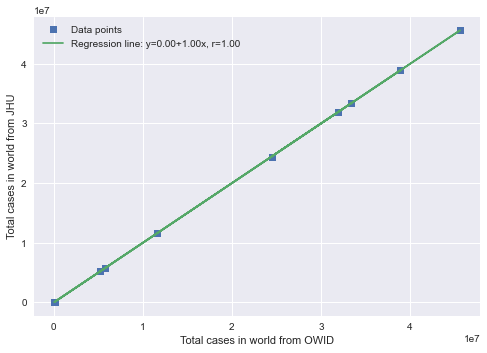

In [21]:
data = dailyKeyReturnerUsingLoc('World','total_cases')
x = []
for i in range(10):
    x.append(np.random.randint(313)-1)    
data_JHU = []
data_OWID = []
for i in x:
    data_OWID.append(data[1][i])
    data_JHU.append(totalCasesInWorldJHU[i])
    
plt.style.use('seaborn')
slope, intercept, r, p, stderr = scipy.stats.linregress(data_OWID, data_JHU )
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
print(line)
fig, ax = plt.subplots()
ax.plot(data_OWID, data_JHU, linewidth=0, marker='s', label='Data points')
temp = []
for x in data_OWID:
    temp.append(slope*x)
ax.plot(data_OWID, intercept + temp, label=line)
ax.set_xlabel('Total cases in world from OWID')
ax.set_ylabel('Total cases in world from JHU')
ax.legend(facecolor='white')
plt.show()

<h1>Introduction</h1>

list of plots:
INTRODUCTION
1. total cases, deaths in world := separate line plots
2. Heat map of cases in world := country wise current case
3. total cases,deaths in India
4. Correlation between cases of India and World
5. Correlation between deaths of India and World
HYPOTHESIS
1. New cases per million in India and USA := two line plots, box plots
2. New cases per million in India and USA := "Correlation/regression"
3. Age groups number of covid cases in different age groups := pie chart
4. Age groups grid := total cases/mil , age 65 older, age 70 older, median age
5. diseases grid := disease_list = 'cardiovasc', 'female_smokers', 'male_smokers', 'diabetes_prevalence', 'totaldeaths/mil'
6. altitude grid := altitude, cases/mil, deaths/mil
7. economy grid := cases/mil , gdp , human_development_index,  extreme_poverty
8. Hospital facilities grid := deaths/mil , cases/mil, life_expectancy, handwashing_facilities, hospital_beds_per_thousand
9. Indian Economy grid := cases month wise ,  GOVERNMENT REVENUES, INFLATION RATE	
10. India vs USA GDP comaprision := bar graph
Interpretation:
11. Female smokers, age 70 older, deaths := scatter heat map

Utility functions for plotting used :

In [22]:
def dayWisePlotter(x,y,figsize,xlabel,ylabel,title,MaxNLocator,xticklabels,rotation):
    plt.figure(figsize=figsize)
    ax = plt.axes(xlabel=xlabel,ylabel=ylabel,title=title)
    ax.xaxis.set_major_locator(plt.MaxNLocator(MaxNLocator))
    fig = ax.figure
    ax.figure.canvas.draw()
    ax.yaxis.set_major_formatter('{x:0.0f}')
    ax.set_xticklabels(xticklabels)                
    fig.autofmt_xdate(rotation=rotation)
    ax.plot(x,y)
    plt.show()

def monthWisePlotter(x,y,figsize,xlabel,ylabel,title):
    plt.figure(figsize=figsize)
    ax = plt.axes(xlabel=xlabel,ylabel=ylabel,title=title)
    ax.plot(x,y)
    plt.show()


    

utility functions for interpretation:

In [27]:
def correlationChecker(data_OWID,data_JHU,owid,jhu):
    slope, intercept, r, p, stderr = scipy.stats.linregress(data_OWID, data_JHU )
    line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
    print(line)
    fig, ax = plt.subplots()
    ax.plot(data_OWID, data_JHU, linewidth=0, marker='s', label='Data points')
    temp = []
    for x in data_OWID:
        temp.append(slope*x)
    ax.plot(data_OWID, intercept + temp, label=line)
    ax.set_xlabel(owid)
    ax.set_ylabel(jhu)
    ax.legend(facecolor='white')
    plt.show()



<h2> Total cases worldwide </h2>

<ipython-input-22-c578551f4108>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


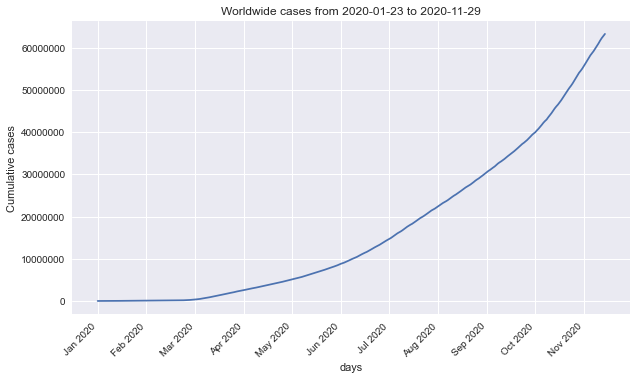

In [25]:
xticklabels=["","Jan 2020","Feb 2020","Mar 2020","Apr 2020","May 2020","Jun 2020","Jul 2020","Aug 2020","Sep 2020","Oct 2020","Nov 2020"]   
dayWisePlotter(dateTotalCasesInWorldJHU,totalCasesInWorldJHU,[10,6],"days","Cumulative cases","Worldwide cases from 2020-01-23 to 2020-11-29",12,xticklabels,45)


<h2> Total Deaths World Wide </h2>

<ipython-input-22-c578551f4108>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


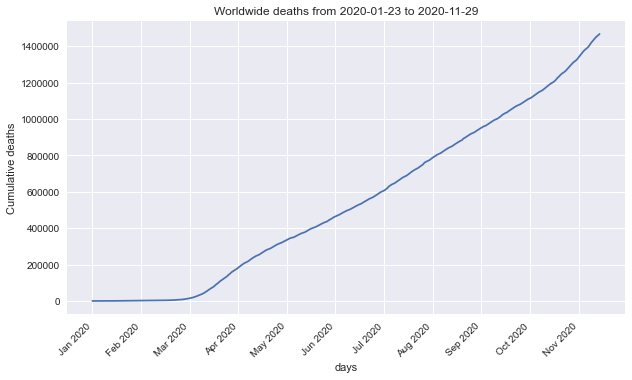

In [26]:
dayWisePlotter(dateTotalDeathsInWorldJHU,totalDeathsInWorldJHU,[10,6],"days","Cumulative deaths","Worldwide deaths from 2020-01-23 to 2020-11-29",12,xticklabels,45)

Let us look for the correlation between the cases and deaths.

<h2> Heat Map for Current Cases around the globe </h2>

In [28]:

circle_radius = 10
typeLists = ['stamen-watercolor']
for i in typeLists:
    fig = px.density_mapbox(df_country_cases, lat='Lat', lon='Long', radius=circle_radius, zoom=0, mapbox_style=i)
    fig.show()


<h2> Total cases and Deaths in India </h2>

<ipython-input-33-c578551f4108>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



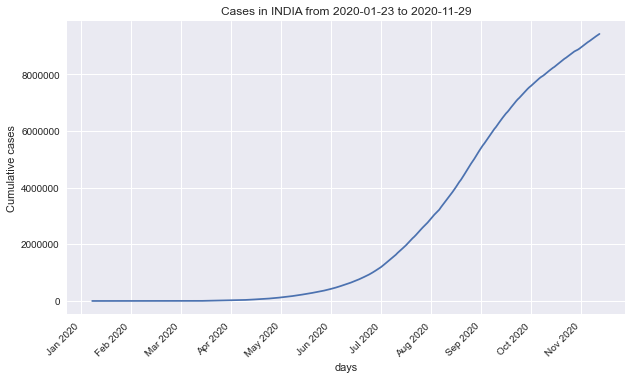

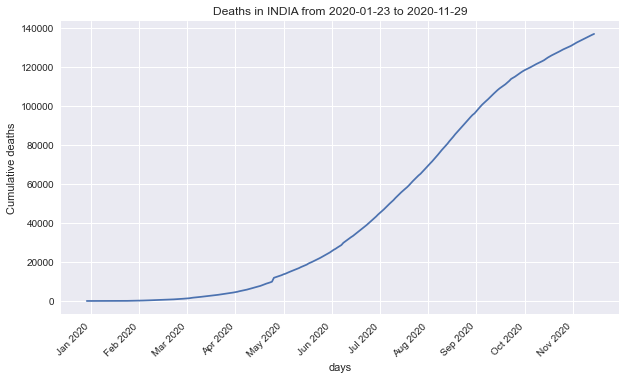

In [38]:
dataCasesIND = dailyKeyReturnerUsingLoc('India','total_cases')
dataCasesIND_month = []
for i in range(len(dataCasesIND[0])):
    test = dataCasesIND[0][i]
    test = test[len(test)-2:]
#     print(test)
    p = re.compile('01$')
    if p.match(test):
        dataCasesIND_month.append(dataCasesIND[1][i])
# print(dataCasesIND_month)
dataDeathsIND = dailyKeyReturnerUsingLoc('India','total_deaths')
dayWisePlotter(dataCasesIND[0],dataCasesIND[1],[10,6],"days","Cumulative cases","Cases in INDIA from 2020-01-23 to 2020-11-29",12,xticklabels,45)
dayWisePlotter(dataDeathsIND[0],dataDeathsIND[1],[10,6],"days","Cumulative deaths","Deaths in INDIA from 2020-01-23 to 2020-11-29",12,xticklabels,45)


Let us check the correlation of cases and deaths in India as compared to those in the world

Regression line: y=3487199.83+5.40x, r=0.98


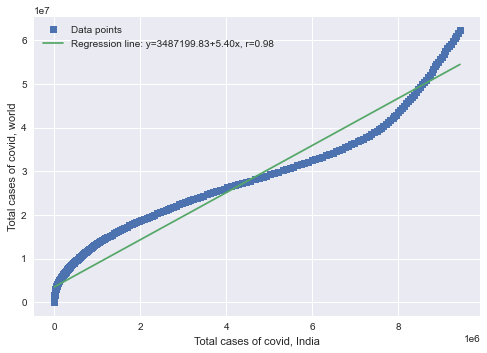

Regression line: y=247965.70+8.25x, r=0.97


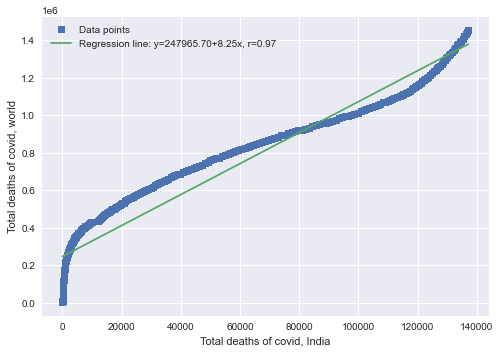

In [46]:
casesInIND = []
casesInWorld = []
for i in range(len(dataCasesIND[1])):
    if dataCasesIND[1][i]!= None and totalCasesInWorldJHU[i]!= None:
        casesInIND.append(dataCasesIND[1][i])
        casesInWorld.append(totalCasesInWorldJHU[i])
deathsInIND = []
deathsInWorld = []
for i in range(len(dataDeathsIND[1])):
    if dataDeathsIND[1][i]!= None and totalDeathsInWorldJHU[i]!= None:
        deathsInIND.append(dataDeathsIND[1][i])
        deathsInWorld.append(totalDeathsInWorldJHU[i])
    
        
        
correlationChecker(casesInIND,casesInWorld,"Total cases of covid, India","Total cases of covid, world")   
correlationChecker(deathsInIND,deathsInWorld,"Total deaths of covid, India","Total deaths of covid, world")    

<H1> Hypothesis </H1>

<h2> Cases Across Different Countries :</h2>

<ipython-input-51-d2c4284355a5>:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



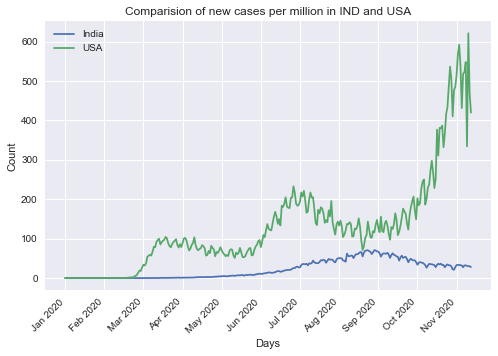

In [51]:

dataCasesDailyIND = dailyKeyReturnerUsingLoc('India','new_cases_per_million')    
dataCasesDailyUSA = dailyKeyReturnerUsingLoc('United States','new_cases_per_million')    
plt.figure()
ax = plt.axes(xlabel="Days",ylabel="Count",title="Comparision of new cases per million in IND and USA")
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
fig = ax.figure
ax.figure.canvas.draw()
ax.yaxis.set_major_formatter('{x:0.0f}')
ax.set_xticklabels(xticklabels)                
fig.autofmt_xdate(rotation=45)
ax.plot(dataCasesDailyIND[0],dataCasesDailyIND[1],label="India")
ax.plot(dataCasesDailyUSA[0],dataCasesDailyUSA[1],label="USA")
plt.legend()
plt.show()

In [46]:
print(len(dataCasesDailyIND[0]))
print(len(dataCasesDailyUSA[0]))

312
313


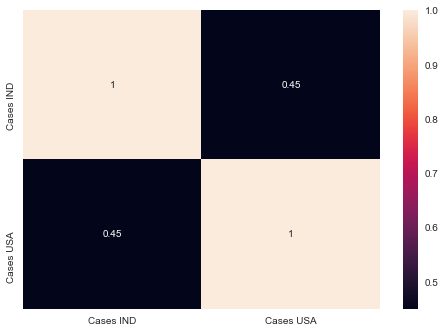

In [70]:
# df_small =  pd.DataFrame([dataCasesDailyIND[0],dataCasesDailyIND[1],dataCasesDailyUSA[1][:-1]],columns=[['Date','CasesIND','CasesUSA']])

dateCPM = []
newCPMIND = [0]
newCPMUSA = [0]
for i in range(len(dataCasesDailyIND[0])):
    if dataCasesDailyUSA[1][:-1][i]!=None and dataCasesDailyIND[1][i]!= None:
        dateCPM.append(dataCasesDailyIND[0])
        newCPMUSA.append(dataCasesDailyUSA[1][:-1][i])
        newCPMIND.append(dataCasesDailyIND[1][i])


array = np.array([newCPMIND,newCPMUSA])
index_values = dateCPM
column_values = ['Cases IND','Cases USA']
df_small = pd.DataFrame(data = array,  
                  index = column_values,  
                  columns = index_values) 

# print(df_small.T) 
df = df_small.T
df.astype(float)
correlation_mat = df.corr()
# print(correlation_mat)
sns.heatmap(correlation_mat, annot = True)
plt.show()

Regression line: y=88.74+2.38x, r=0.37


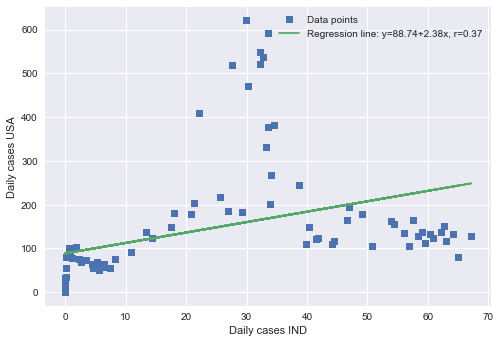

(0.36712720730623866, 0.00017182571935054283)

In [36]:
slope, intercept, r, p, stderr = scipy.stats.linregress(dataCasesDailyIND[1], dataCasesDailyUSA[1][1:])
sample_corr_IND = []
sample_corr_USA = []
for i in range(100):
    x = np.random.randint(len(dataCasesDailyIND[1])-1)
    sample_corr_IND.append(dataCasesDailyIND[1][x])
    sample_corr_USA.append(dataCasesDailyUSA[1][1:][x])
correlationChecker(sample_corr_IND,sample_corr_USA,"Daily cases IND","Daily cases USA")   
result = scipy.stats.pearsonr(sample_corr_IND, sample_corr_USA)
result

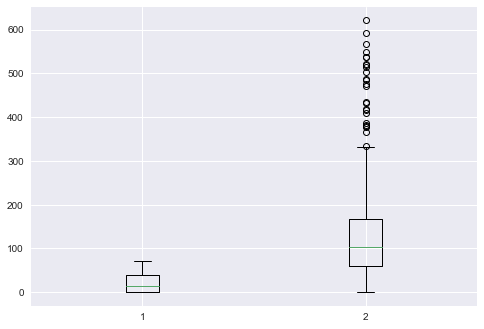

In [37]:
data=[dataCasesDailyIND[1],dataCasesDailyUSA[1][1:]]
plt.boxplot(data)
plt.show()


<h2> Age Groups </h2>

([<matplotlib.patches.Wedge at 0x1ba244713d0>,
 [Text(1.099864295735893, 0.017278048656840017, 'Less than 14 years'),
  Text(1.0933570509441903, 0.12070774271198717, '15-29 years'),
  Text(0.9397051872092018, 0.5717990566030334, '30-44 years'),
  Text(-0.4652279531565006, 0.9967762796143441, '45-59 years'),
  Text(-0.36610163557183434, -1.0372895412716876, '60-74 years'),
  Text(1.042912059127538, -0.34976340135348516, 'More than 75 years')])

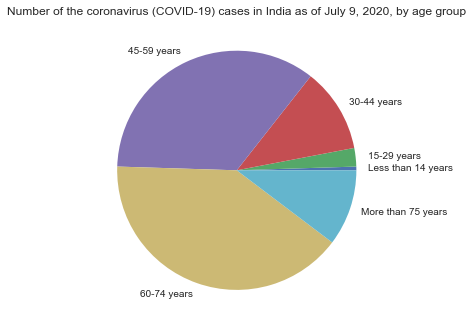

In [25]:

ageGroup = []
percentage = []

colAge = ws_age_data['B']
colPer = ws_age_data['C']
for x in range(5,11):
    ageGroup.append(colAge[x].value)
    percentage.append(colPer[x].value)
plt.title("Number of the coronavirus (COVID-19) cases in India as of July 9, 2020, by age group")
plt.pie(percentage, labels = ageGroup) 
    



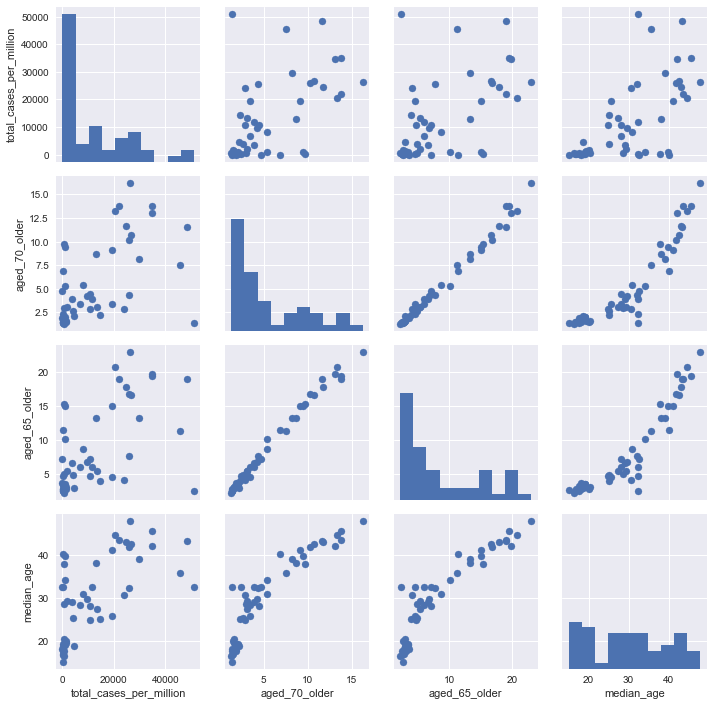

In [78]:

g=sb.PairGrid(data=df_ageGroupData.sample(n=50), vars=ageGroupList)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);

<h2> Diseases : </h2>

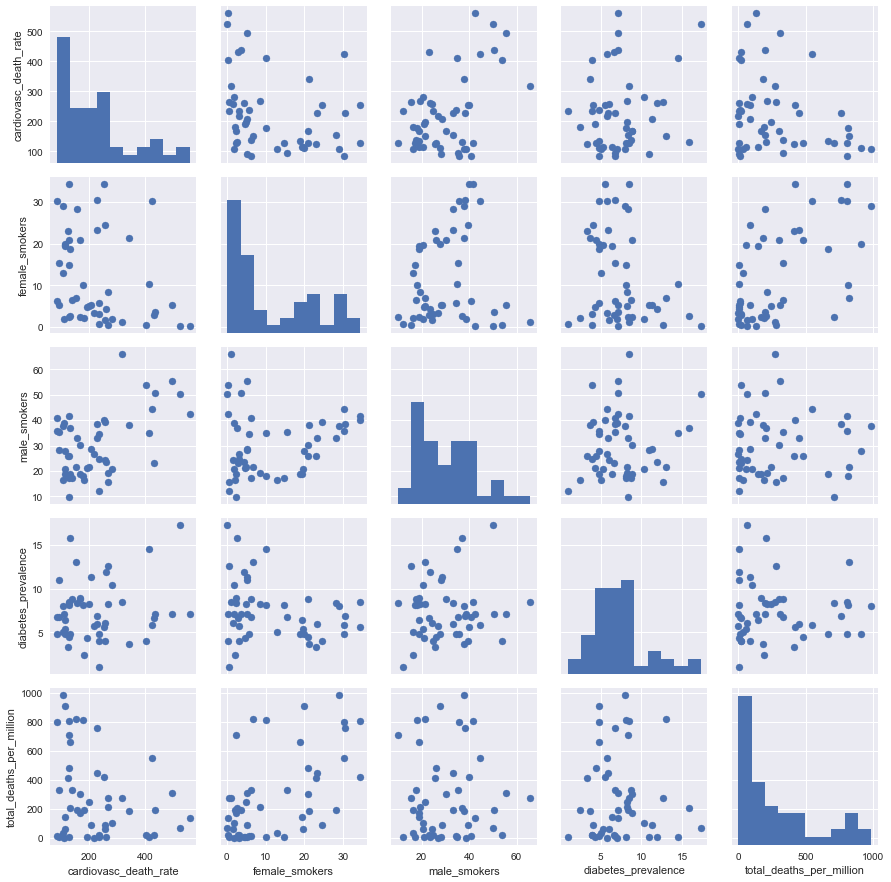

In [84]:
g=sb.PairGrid(data=df_disease.sample(n=50), vars=disease_list)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);


<h2> Altitude </h2>

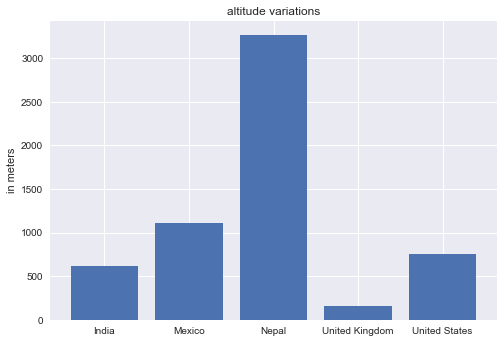

NameError: name 'dataS5' is not defined

In [63]:
column = ws_altitude['A']  # Column
columnalt = ws_altitude['D']
countriesToLookFor = ['India','Mexico','Nepal','United Kingdom','United States']
data=[]
countries=[]
for i in range(len(column)):
    countries.append(column[i].value)


for i in countriesToLookFor:
    x=columnalt[countries.index(i)].value
    s=''
    for i in x:
        if i.isdigit():
            s=s+i
        elif i==',':
            continue
        else:
            break
    data.append(int(s))

plt.bar(countriesToLookFor,data)
plt.title('altitude variations')
plt.ylabel('in meters')
plt.show()


countriesToLookFor = ['IND','MEX','NPL','UKR','USA']
totalCases = []
for C in countriesToLookFor:    
    totalCases.append(dailyCasesPlotter(C,'new_cases_per_million'))
countriesToLookFor[3] = 'UK'
totalCases[3] = 1640000*1000000/66000000
plt.bar(countriesToLookFor,totalCases)
plt.title("Total cases of covid")

<h2> Economy </h2>

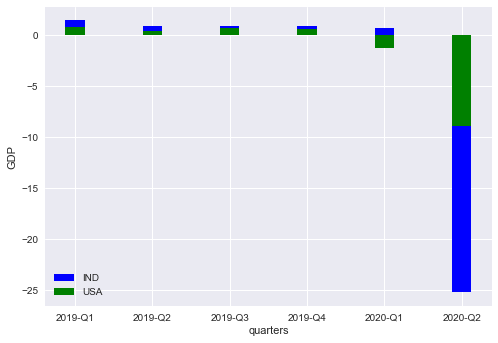

In [29]:
column = ws_economy['A']
countries=['USA','IND']
time=['2019-Q1','2019-Q2','2019-Q3','2019-Q4','2020-Q1','2020-Q2']
values=ws_economy['G']

gdpind=[]
gdpusa=[]
for j in range(1,len(column)):
    if column[j].value=='USA':
        gdpusa.append(values[j].value)
    if column[j].value=='IND':
        gdpind.append(values[j].value)


gdpusa.pop()
data=[gdpind,gdpusa]
fig, ax = plt.subplots() 
ax.bar(time, data[0], color = 'b', width = 0.25)
ax.bar(time, data[1], color = 'g', width = 0.25)
ax.legend(['IND','USA'],loc="lower left")
plt.xlabel('quarters')
plt.ylabel('GDP')
plt.show()


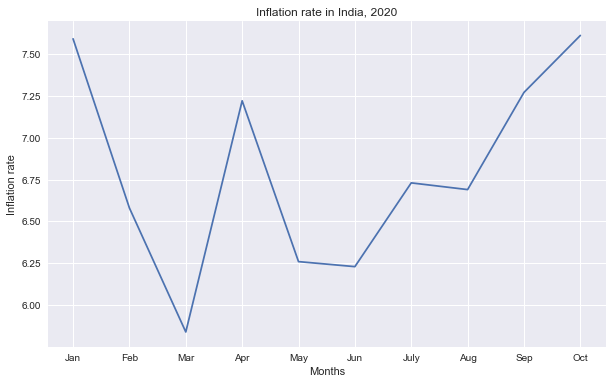

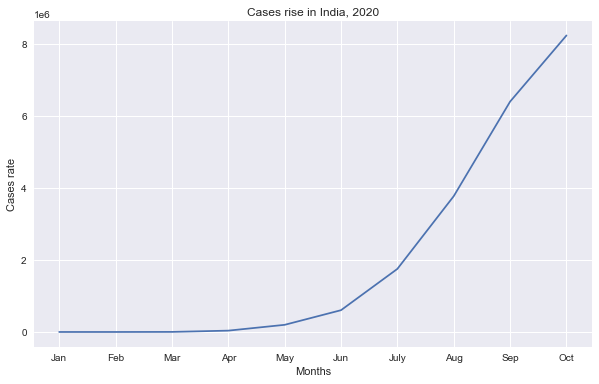

In [56]:
#inflation rate
data = economyGetter("INFLATION RATE")

month = ["Jan","Feb","Mar","Apr","May","Jun","July","Aug","Sep","Oct"]
monthWisePlotter(month,data,[10,6],"Months","Inflation rate","Inflation rate in India, 2020")
monthWisePlotter(month,dataCasesIND_month,[10,6],"Months","Cases rate","Cases rise in India, 2020")


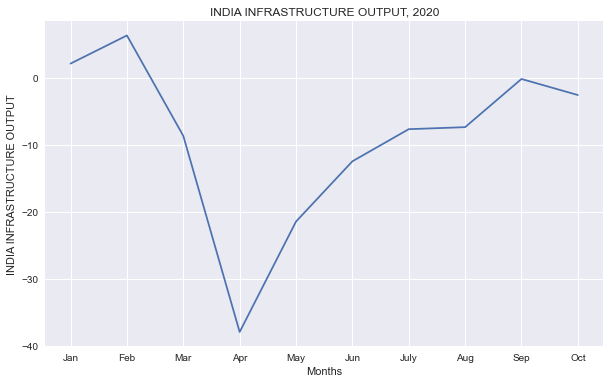

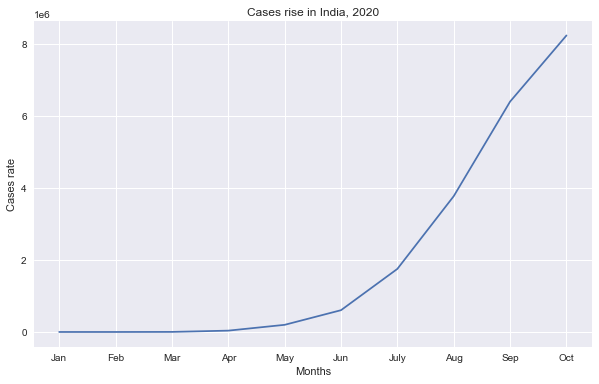

In [57]:
data = economyGetter("INDIA INFRASTRUCTURE OUTPUT")
monthWisePlotter(month,data,[10,6],"Months","INDIA INFRASTRUCTURE OUTPUT","INDIA INFRASTRUCTURE OUTPUT, 2020")
monthWisePlotter(month,dataCasesIND_month,[10,6],"Months","Cases rate","Cases rise in India, 2020")


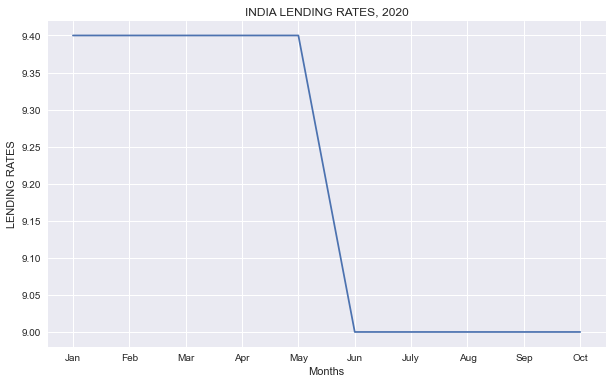

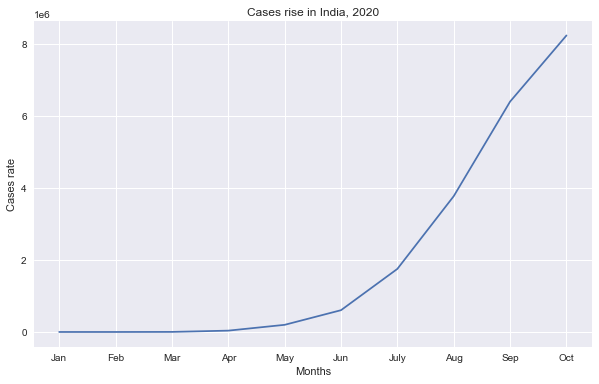

In [58]:
data = economyGetter("LENDING RATES")
monthWisePlotter(month,data,[10,6],"Months","LENDING RATES","INDIA LENDING RATES, 2020")
monthWisePlotter(month,dataCasesIND_month,[10,6],"Months","Cases rate","Cases rise in India, 2020")


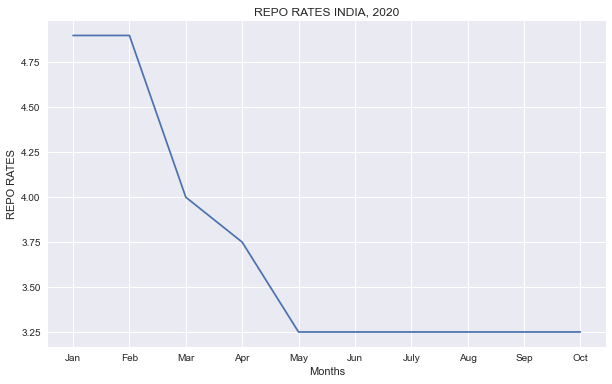

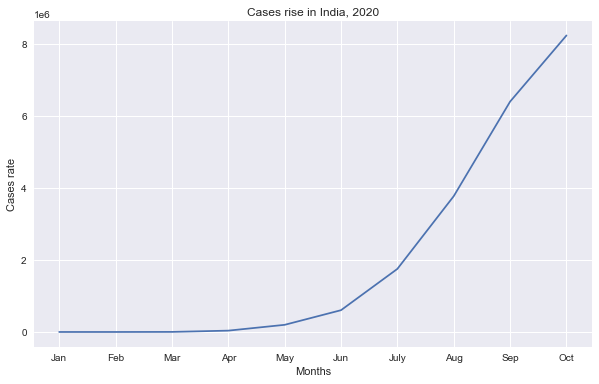

In [59]:
data = economyGetter("REPO RATES")
monthWisePlotter(month,data,[10,6],"Months","REPO RATES","REPO RATES INDIA, 2020")
monthWisePlotter(month,dataCasesIND_month,[10,6],"Months","Cases rate","Cases rise in India, 2020")


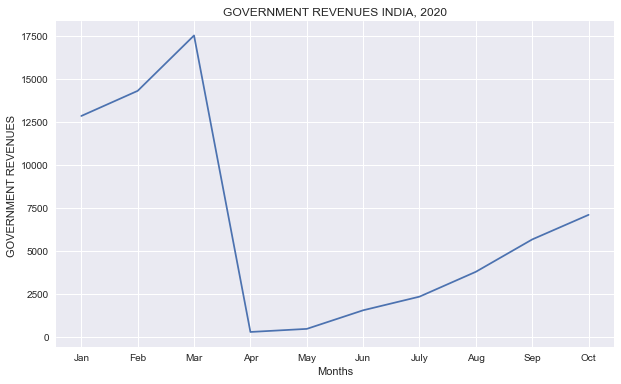

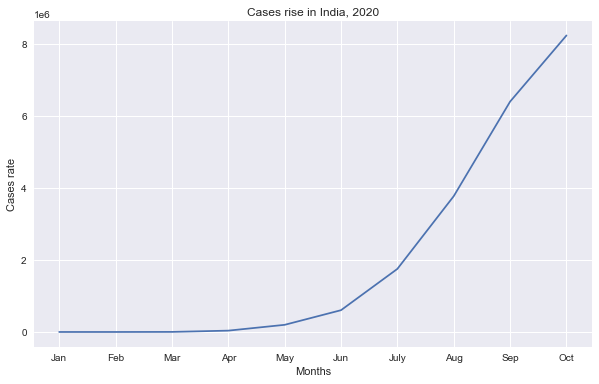

In [60]:
data = economyGetter("GOVERNMENT REVENUES ")
monthWisePlotter(month,data,[10,6],"Months","GOVERNMENT REVENUES ","GOVERNMENT REVENUES INDIA, 2020")
monthWisePlotter(month,dataCasesIND_month,[10,6],"Months","Cases rate","Cases rise in India, 2020")


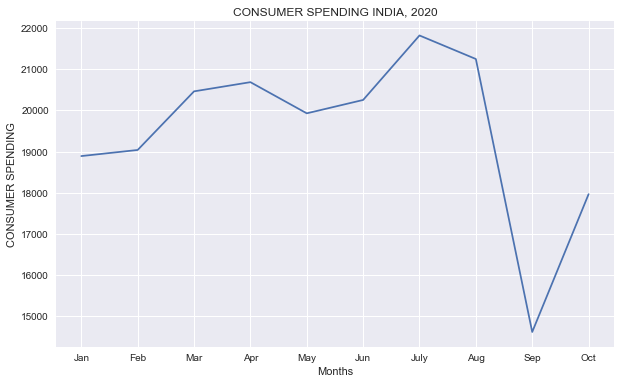

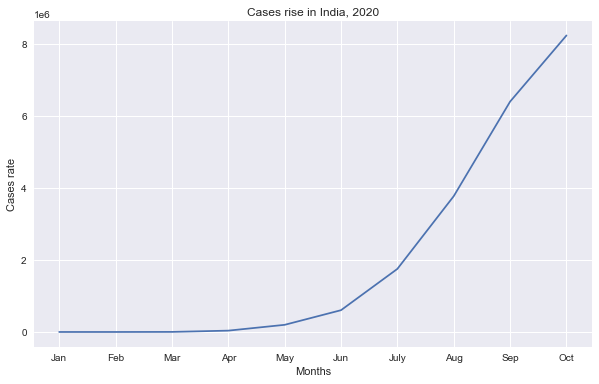

In [61]:
data = economyGetter("CONSUMER SPENDING")
monthWisePlotter(month,data,[10,6],"Months","CONSUMER SPENDING","CONSUMER SPENDING INDIA, 2020")
monthWisePlotter(month,dataCasesIND_month,[10,6],"Months","Cases rate","Cases rise in India, 2020")


<h2> After Lockdown Effects </h2>

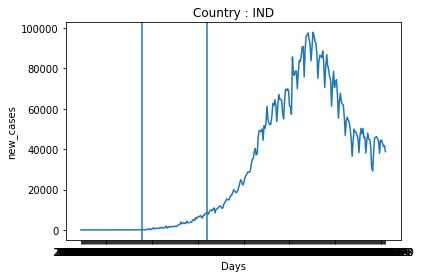

In [94]:

def dailyCasesPlotter(code,key,startDate,endDate):
    iso_codes = dataS5['iso_code']
#     print(iso_codes)
    date = dataS5['date']
    total_cases = dataS5[key]
    total_cases_IND = []
    date_IND = []
    for x in range(len(iso_codes)):
        if iso_codes[x] == code:
            total_cases_IND.append(total_cases[x])
            date_IND.append(date[x])
    pyplot.plot(date_IND,total_cases_IND)
    pyplot.title("Country : " + code)
    pyplot.xlabel("Days")
    pyplot.axvline(x=startDate)
    pyplot.axvline(x=endDate)
    pyplot.ylabel(key)
    pyplot.show()

dailyCasesPlotter('IND','new_cases','2020-03-25','2020-05-31')

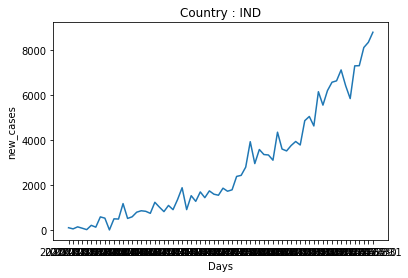

In [113]:

def dailyCasesLPlotter(code,key,startDate,endDate):
    iso_codes = dataS5['iso_code']
#     print(iso_codes)
    date = dataS5['date']
    total_cases = dataS5[key]
    total_cases_IND = []
    date_IND = []
    for x in range(len(iso_codes)):
        if iso_codes[x] == code:
            total_cases_IND.append(total_cases[x])
            date_IND.append(date[x])
    startKey = date.index(startDate)
    endKey = date.index(endDate)
    final_cases = []
    final_date = []
    for x in range(startKey,endKey+1):
        final_cases.append(total_cases_IND[x])
        final_date.append(date_IND[x])
    pyplot.plot(final_date,final_cases)
    pyplot.title("Country : " + code)
    pyplot.xlabel("Days")
    pyplot.ylabel(key)
    pyplot.show()
    
dailyCasesLPlotter('IND','new_cases','2020-03-25','2020-05-31')    

([<matplotlib.patches.Wedge at 0x26b03cd7640>,
 [Text(-0.46835717599151955, 0.995309778760989, 'Bought at a higher price than mandated by the government at a retail store/chemist'),
  Text(0.13786642613375089, -1.0913261879681562, 'Bought at government mandated price at a retail store/chemist'),
  Text(1.0461621185951564, -0.33991884563303376, 'Bought at a higher price than mandated by the government online')])

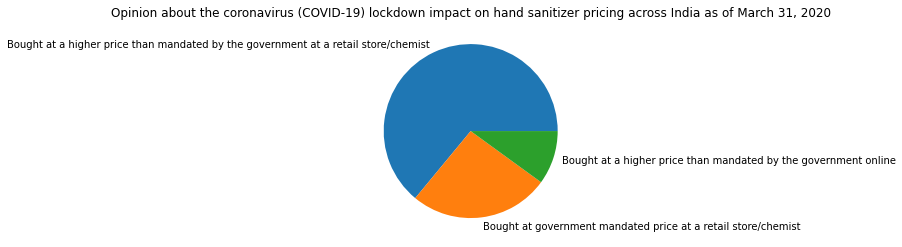

In [96]:
wbAge = load_workbook("D:\statistic_id1108922_opinion-on-impact-of-covid-19-lockdown-on-hand-sanitizer-prices-india-2020.xlsx")  # Work Book
wsAge = wbAge[wbAge.sheetnames[1]]

ageGroup = []
percentage = []

colAge = wsAge['B']
colPer = wsAge['C']

for x in range(5,8):
    ageGroup.append(colAge[x].value)
    percentage.append(colPer[x].value)
pyplot.title("Opinion about the coronavirus (COVID-19) lockdown impact on hand sanitizer pricing across India as of March 31, 2020")
pyplot.pie(percentage, labels = ageGroup) 
    



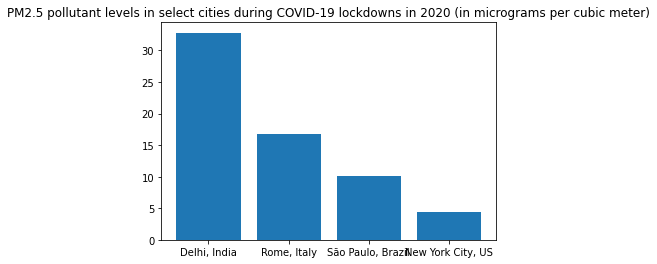

Text(0.5, 1.0, 'Total cases of covid')

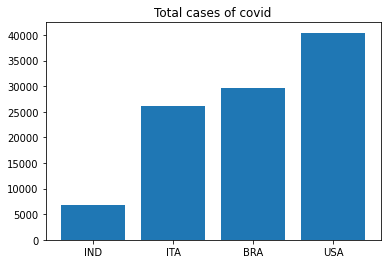

In [112]:
wbAge = load_workbook("D:\statistic_id1119805_pm25-pollutant-levels-in-select-worldwide-cities-during-covid-19-lockdown-2020.xlsx")  # Work Book
wsAge = wbAge[wbAge.sheetnames[1]]

ageGroup = []
percentage = []

colAge = wsAge['B']
colPer = wsAge['C']

for x in range(6,10):
    ageGroup.append(colAge[x].value)
    percentage.append(colPer[x].value)
#     percentage.append(0)
pyplot.title("PM2.5 pollutant levels in select cities during COVID-19 lockdowns in 2020 (in micrograms per cubic meter)")
pyplot.bar(ageGroup,percentage)
pyplot.show()
countriesToLookFor = ['IND','ITA','BRA','USA']
totalCases = []
for C in countriesToLookFor:    
    totalCases.append(dailyCasesPlotter(C,'new_cases_per_million'))

pyplot.bar(countriesToLookFor,totalCases)
pyplot.title("Total cases of covid")    



In [101]:
columnHeadings = dataS5.keys()
print(columnHeadings)

dict_keys(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_faci

In [96]:
df_interpretation_data = df_cases_today.dropna(subset=['aged_70_older', 'female_smokers', 'total_deaths_per_million'])
df_interpretation_data[['aged_70_older', 'female_smokers', 'total_deaths_per_million']].describe()


aged_70_older  female_smokers  total_deaths_per_million
count     133.000000      133.000000                133.000000
mean        6.314150       10.324316                247.088722
std         4.481236       10.282214                297.358834
min         0.526000        0.100000                  0.352000
25%         2.380000        1.900000                 18.502000
50%         5.030000        5.900000                105.982000
75%         9.842000       19.100000                362.122000
max        18.493000       44.000000               1427.744000

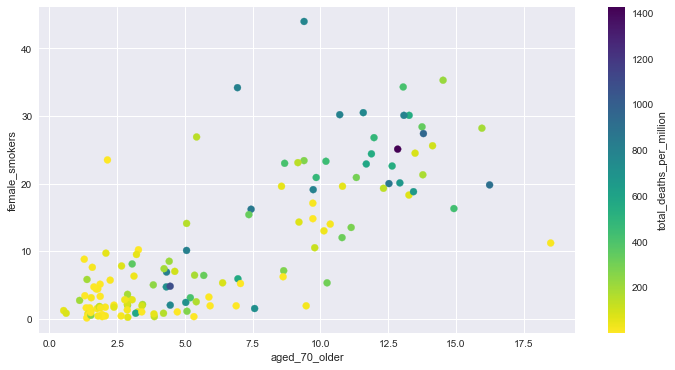

In [98]:
plt.figure(figsize=[12,6])
plt.scatter(data=df_interpretation_data, x='aged_70_older', y='female_smokers', c='total_deaths_per_million', cmap='viridis_r' );
plt.colorbar(label='total_deaths_per_million');
plt.xlabel('aged_70_older');
plt.ylabel('female_smokers');
axes = plt.gca()